In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Primero se Descargan los precios diarios de las empresas listadas en la BMV

In [4]:
Acciones = pd.read_csv('Daily Closes.csv',index_col='Date')
Acciones

^MXX  BIMBOA.mx   ELEKTRA.MX  GMEXICOB.MX  WALMEX.MX
Date                                                                    
2019-08-19  39556.320312  33.729321  1373.018799    39.068489  55.391689
2019-08-20  39700.050781  33.187206  1371.992310    40.369488  55.775875
2019-08-21  40076.039062  32.664806  1362.963623    41.853584  56.632908
2019-08-22  40144.238281  32.881653  1397.593140    41.429562  55.588711
2019-08-23  39862.070312  32.507099  1395.879028    41.275368  55.263630
2019-08-26  40081.718750  32.359253  1385.305908    41.381371  54.560452
2019-08-27  40648.968750  32.792942  1394.354370    42.470356  54.936806
2019-08-28  40941.960938  33.246346  1394.753052    43.954460  55.105167
2019-08-29  41831.300781  34.103870  1389.600952    44.195385  55.768726
2019-08-30  42622.500000  34.567131  1382.934204    44.484497  56.184689
2019-09-02  42108.230469  34.685410  1394.892578    43.790630  55.451805
2019-09-03  41826.550781  33.709606  1395.321045    43.655708  55.758823
2019-09-04  42324.468750  36.025909  1389.262085    43.780994  57.016617
2019-09-05  42731.480469  36.508884  1395.121704    44.002644  58.373447
2019-09-06  42707.660156  36.745441  1390.776855    43.356964  57.600945
2019-09-09  42662.468750  36.380749  1380.602295    42.692009  57.462292
2019-09-10  42588.101562  36.765156  1375.978394    43.356964  56.006420
2019-09-11  42749.171875  36.213188  1391.135620    43.954460  56.263924
2019-09-12  42670.410156  35.631649  1400.323608    44.783245  57.779213
2019-09-13  42841.460938  36.203331  1388.445068    43.993008  57.115654
2019-09-17  43448.941406  35.710499  1381.469360    45.592751  56.184689
2019-09-18  43070.339844  35.335945  1389.810303    44.860340  54.966515
2019-09-19  43017.460938  35.552792  1394.643433    44.108650  54.659492
2019-09-20  43559.449219  36.538456  1458.520874    44.339939  54.481224
2019-09-23  43507.949219  37.356556  1424.668823    45.448196  54.629784
2019-09-24  43099.328125  36.154045  1411.903198    44.523041  54.659492
2019-09-25  43014.078125  35.661217  1380.881226    45.506020  55.164593
2019-09-26  42984.750000  35.552792  1390.497803    44.571228  56.392670
2019-09-27  42857.578125  35.533081  1393.487427    44.802517  57.789116
2019-09-30  43011.269531  35.473942  1394.882568    44.465221  57.917870
...                  ...        ...          ...          ...        ...
2020-07-09  36795.949219  37.369999  1259.839966    55.570000  55.020000
2020-07-10  36465.460938  37.509998  1237.290039    54.660000  54.880001
2020-07-13  36389.390625  37.000000  1212.719971    57.119999  53.889999
2020-07-14  36190.910156  36.189999  1199.420044    55.880001  54.380001
2020-07-15  36590.261719  35.799999  1200.280029    55.900002  54.599998
2020-07-16  36465.671875  35.820000  1201.839966    55.090000  56.029999
2020-07-17  36327.839844  36.360001  1195.670044    54.540001  56.430000
2020-07-20  36323.691406  36.220001  1192.880005    54.740002  56.080002
2020-07-21  36881.671875  36.770000  1198.800049    54.320000  56.500000
2020-07-22  37447.101562  37.369999  1200.569946    57.080002  56.360001
2020-07-23  37433.300781  37.779999  1202.150024    58.020000  55.619999
2020-07-24  37357.460938  38.939999  1201.109985    58.980000  56.490002
2020-07-27  37742.140625  39.209999  1200.260010    59.470001  56.320000
2020-07-28  37771.210938  44.730000  1198.969971    61.480000  54.660000
2020-07-29  37720.839844  42.130001  1194.979980    59.750000  54.400002
2020-07-30  37136.781250  40.930000  1193.369995    56.720001  52.810001
2020-07-31  37019.679688  40.090000  1191.780029    56.209999  52.230000
2020-08-03  37546.718750  41.290001  1194.060059    57.009998  53.910000
2020-08-04  37466.949219  41.130001  1192.930054    57.980000  54.430000
2020-08-05  37901.960938  41.730000  1192.209961    61.619999  54.970001
2020-08-06  37998.339844  40.709999  1191.260010    61.779999  54.029999
2020-08-07  38005.000000  40.040001  1192.900024    59.360001  55.590000
2020-

#  Gráficamos la trayectoria de los precios para notar el comportaiento individual

In [3]:
Acciones.plot(figsize=(20,8),lw=5)
plt.title('Gráfica Precios dataMX',fontsize=20, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best',prop={'size': 20})
plt.grid()
plt.show()

# Obtenemos el rendimiento de las acciones previamente listadas

In [5]:
monthly_ret = Acciones.pct_change().dropna()
round(monthly_ret,4)

^MXX  BIMBOA.mx  ELEKTRA.MX  GMEXICOB.MX  WALMEX.MX
Date                                                             
2019-08-20  0.0036    -0.0161     -0.0007       0.0333     0.0069
2019-08-21  0.0095    -0.0157     -0.0066       0.0368     0.0154
2019-08-22  0.0017     0.0066      0.0254      -0.0101    -0.0184
2019-08-23 -0.0070    -0.0114     -0.0012      -0.0037    -0.0058
2019-08-26  0.0055    -0.0045     -0.0076       0.0026    -0.0127
2019-08-27  0.0142     0.0134      0.0065       0.0263     0.0069
2019-08-28  0.0072     0.0138      0.0003       0.0349     0.0031
2019-08-29  0.0217     0.0258     -0.0037       0.0055     0.0120
2019-08-30  0.0189     0.0136     -0.0048       0.0065     0.0075
2019-09-02 -0.0121     0.0034      0.0086      -0.0156    -0.0130
2019-09-03 -0.0067    -0.0281      0.0003      -0.0031     0.0055
2019-09-04  0.0119     0.0687     -0.0043       0.0029     0.0226
2019-09-05  0.0096     0.0134      0.0042       0.0051     0.0238
2019-09-06 -0.0006     0.0065     -0.0031      -0.0147    -0.0132
2019-09-09 -0.0011    -0.0099     -0.0073      -0.0153    -0.0024
2019-09-10 -0.0017     0.0106     -0.0033       0.0156    -0.0253
2019-09-11  0.0038    -0.0150      0.0110       0.0138     0.0046
2019-09-12 -0.0018    -0.0161      0.0066       0.0189     0.0269
2019-09-13  0.0040     0.0160     -0.0085      -0.0176    -0.0115
2019-09-17  0.0142    -0.0136     -0.0050       0.0364    -0.0163
2019-09-18 -0.0087    -0.0105      0.0060      -0.0161    -0.0217
2019-09-19 -0.0012     0.0061      0.0035      -0.0168    -0.0056
2019-09-20  0.0126     0.0277      0.0458       0.0052    -0.0033
2019-09-23 -0.0012     0.0224     -0.0232       0.0250     0.0027
2019-09-24 -0.0094    -0.0322     -0.0090      -0.0204     0.0005
2019-09-25 -0.0020    -0.0136     -0.0220       0.0221     0.0092
2019-09-26 -0.0007    -0.0030      0.0070      -0.0205     0.0223
2019-09-27 -0.0030    -0.0006      0.0022       0.0052     0.0248
2019-09-30  0.0036    -0.0017      0.0010      -0.0075     0.0022
2019-10-01 -0.0017     0.0069     -0.0045      -0.0059     0.0000
...            ...        ...         ...          ...        ...
2020-07-09 -0.0184    -0.0278     -0.0004       0.0029    -0.0027
2020-07-10 -0.0090     0.0037     -0.0179      -0.0164    -0.0025
2020-07-13 -0.0021    -0.0136     -0.0199       0.0450    -0.0180
2020-07-14 -0.0055    -0.0219     -0.0110      -0.0217     0.0091
2020-07-15  0.0110    -0.0108      0.0007       0.0004     0.0040
2020-07-16 -0.0034     0.0006      0.0013      -0.0145     0.0262
2020-07-17 -0.0038     0.0151     -0.0051      -0.0100     0.0071
2020-07-20 -0.0001    -0.0039     -0.0023       0.0037    -0.0062
2020-07-21  0.0154     0.0152      0.0050      -0.0077     0.0075
2020-07-22  0.0153     0.0163      0.0015       0.0508    -0.0025
2020-07-23 -0.0004     0.0110      0.0013       0.0165    -0.0131
2020-07-24 -0.0020     0.0307     -0.0009       0.0165     0.0156
2020-07-27  0.0103     0.0069     -0.0007       0.0083    -0.0030
2020-07-28  0.0008     0.1408     -0.0011       0.0338    -0.0295
2020-07-29 -0.0013    -0.0581     -0.0033      -0.0281    -0.0048
2020-07-30 -0.0155    -0.0285     -0.0013      -0.0507    -0.0292
2020-07-31 -0.0032    -0.0205     -0.0013      -0.0090    -0.0110
2020-08-03  0.0142     0.0299      0.0019       0.0142     0.0322
2020-08-04 -0.0021    -0.0039     -0.0009       0.0170     0.0096
2020-08-05  0.0116     0.0146     -0.0006       0.0628     0.0099
2020-08-06  0.0025    -0.0244     -0.0008       0.0026    -0.0171
2020-08-07  0.0002    -0.0165      0.0014      -0.0392     0.0289
2020-08-10  0.0075     0.0377     -0.0023      -0.0049     0.0097
2020-08-11  0.0108     0.0017      0.0001      -0.0085     0.0069
2020-08-12 -0.0018    -0.0077      0.0004      -0.0046    -0.0037
2020-08-13 -0.0005     0.0000      0.0005       0.0089     0.0021
2020-08-14  0.0087     0.0036     -0.0024       0.0073     0.0121
2020-08-17  0.0086     0.0516      0.0014      -0.0081

# Graficamos los rendimientos individuales

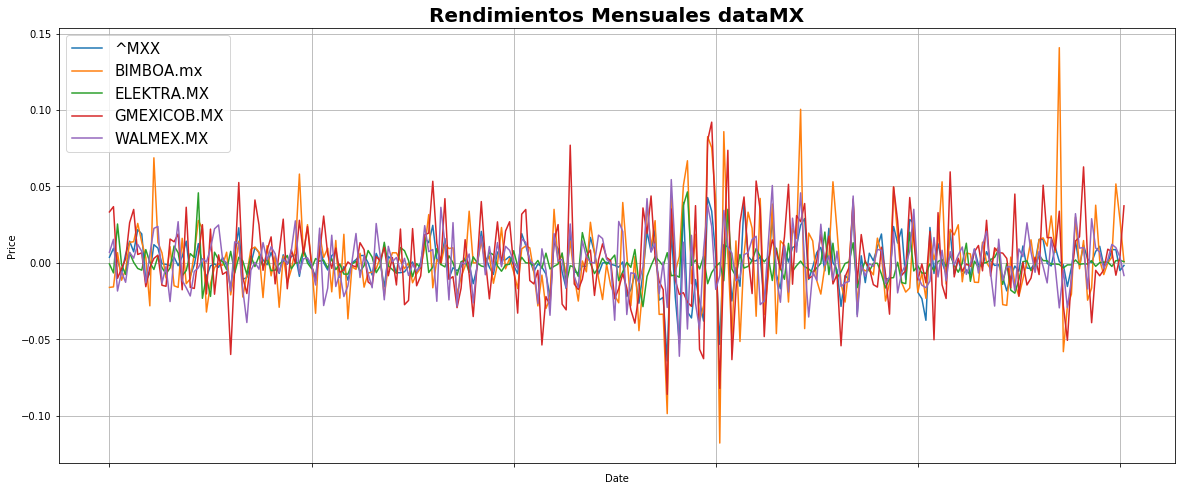

In [6]:
monthly_ret.plot(figsize=(20,8))
plt.title('Rendimientos Mensuales dataMX',fontsize=20, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best',prop={'size': 15})
plt.grid()
plt.show()

# Creamos una tabla en donde se pueda visualizar la media y volatilidad individual de cada activo, ademas de la correlación y covarianza para poder analizar nuestros activos

In [8]:
Monthly = pd.DataFrame(index = ['Monthly Mean','Monthly Volatility'],columns = Acciones.columns)
Monthly.loc['Monthly Mean']=monthly_ret.mean()
Monthly.loc['Monthly Volatility']=monthly_ret.std()
Monthly

^MXX  BIMBOA.mx   ELEKTRA.MX GMEXICOB.MX  \
Monthly Mean        5.37997e-05  0.0014985 -0.000518293  0.00212747   
Monthly Volatility    0.0146708  0.0272437   0.00882184    0.026351   

                      WALMEX.MX  
Monthly Mean        0.000295433  
Monthly Volatility    0.0175082

In [9]:
cov = monthly_ret.cov()
cov

^MXX  BIMBOA.mx    ELEKTRA.MX   GMEXICOB.MX  WALMEX.MX
^MXX         0.000215   0.000210  7.080639e-06  2.555482e-04   0.000144
BIMBOA.mx    0.000210   0.000742  1.668289e-05  2.894725e-04   0.000143
ELEKTRA.MX   0.000007   0.000017  7.782488e-05  3.423102e-08  -0.000007
GMEXICOB.MX  0.000256   0.000289  3.423102e-08  6.943777e-04   0.000142
WALMEX.MX    0.000144   0.000143 -7.218740e-06  1.420565e-04   0.000307

In [10]:
corr = monthly_ret.corr()
corr

^MXX  BIMBOA.mx  ELEKTRA.MX  GMEXICOB.MX  WALMEX.MX
^MXX         1.000000   0.526472    0.054709     0.661030   0.561428
BIMBOA.mx    0.526472   1.000000    0.069414     0.403221   0.298758
ELEKTRA.MX   0.054709   0.069414    1.000000     0.000147  -0.046737
GMEXICOB.MX  0.661030   0.403221    0.000147     1.000000   0.307909
WALMEX.MX    0.561428   0.298758   -0.046737     0.307909   1.000000

# Vamos a crear un portafolio con los activos previamente listados en donde encontraremos un peso optimo para cada uno, en donde se puedan maximizar las ganancias eliminando el riesgo, ya que la diversificación es una manera de disminuir el riesgo, calcularemos tambien el rendimiento esperado y ratio de Sharpe para ver que tan bueno es nuestro portafolio

In [14]:
D = np.diag(Monthly.loc['Monthly Volatility'])
Sigma = D.dot(corr).dot(D)
Eind = np.array(Monthly.loc['Monthly Mean'])
rf = (4.48/100)/12

In [15]:
# Función objetivo
def varianza(w, Sigma):
    return w.dot(Sigma).dot(w)

In [21]:
# Dato inicial
w0 = np.ones((5,))/5
# Cotas de las variables
bnds = ((0,1),)*5
# Restricciones
cons = ({'type': 'eq', 'fun': lambda w: np.sum(w)-1},)

In [22]:
# Portafolio de mínima varianza
minvar = minimize(varianza, w0, args = (Sigma,), 
                  bounds=bnds, constraints=cons)
minvar

     fun: 0.00017751089282971223
     jac: array([3.32997064e-04, 5.60520803e-04, 3.77615634e-05, 5.52595664e-04,
       2.91233871e-04])
 message: 'Optimization terminated successfully.'
    nfev: 7
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([0.2, 0.2, 0.2, 0.2, 0.2])

In [39]:
# Pesos optimos para cada activo
w_minvar = minvar.x
Er_minvar = Eind.dot(w_minvar)
s_minvar = np.sqrt(varianza(w_minvar, Sigma))
sharpe_minvar = (Er_minvar-rf)/s_minvar

In [40]:
#Pesos del portafolio de mínima varianza
w_minvar

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [41]:
#Rendimiento esperado del portafolio de mínima varianza
Er_minvar

0.0006913818170983198

In [42]:
#Volatilidad del portafolio de mínima varianza
s_minvar

0.013323321388817137

In [43]:
#Cociente de Sharpe de mínima varianza
sharpe_minvar

-0.22831780660851286

# Calcularemos un segundo portafolio

In [54]:
# Función objetivo
def m_sharpe_r(w, Sigma, rf, Eind):
    Erp = Eind.dot(w)
    varp= w.dot(Sigma).dot(w)
    return -(Erp-rf)/np.sqrt(varp)

In [57]:
# Dato inicial
w0 = np.ones((5,))/5
# Cotas de las variables
bnds = ((0,1),)*5
# Restricciones
cons = ({'type': 'eq', 'fun': lambda w: np.sum(w)-1},)

In [58]:
# Portafolio EMV
EMV = minimize(m_sharpe_r, w0, args=(Sigma, rf, Eind),
              bounds = bnds, constraints = cons)

In [59]:
## Pesos, rendimiento,volatilidad y cociente de sharpe del portafolio EMV
w_EMV = EMV.x
Er_EMV = Eind.dot(w_EMV)
s_EMV = np.sqrt(w_EMV.dot(Sigma).dot(w_EMV))
sharpe_EMV = (Er_EMV-rf)/s_EMV

In [60]:
#Pesos del portafolio EMV
w_EMV

array([0., 0., 0., 1., 0.])

In [61]:
#Rendimiento del portafolio EMV
Er_EMV

0.0021274658908881183

In [62]:
#Volatilidad del portafolio EMV
s_EMV

0.02635104772482469

In [63]:
#Cociente de Sharpe portafolio EMV
sharpe_EMV

-0.06094131281665762

In [79]:
n = 501
wp = np.linspace(0, 5, n)

LAC = pd.DataFrame(index=np.arange(n), columns=['wp','wrf','$E_r$','$\sigma$','Sharpe'])
LAC['wp'] = wp
LAC['wrf'] = 1-wp
LAC['$E_r$']= wp*Er_EMV+(1-wp)*rf
LAC['$\sigma$']= wp*s_EMV
LAC['Sharpe'] = (LAC['$E_r$']-rf)/LAC['$\sigma$']

LAC

wp   wrf     $E_r$  $\sigma$    Sharpe
0    0.00  1.00  0.003733  0.000000       NaN
1    0.01  0.99  0.003717  0.000264 -0.060941
2    0.02  0.98  0.003701  0.000527 -0.060941
3    0.03  0.97  0.003685  0.000791 -0.060941
4    0.04  0.96  0.003669  0.001054 -0.060941
5    0.05  0.95  0.003653  0.001318 -0.060941
6    0.06  0.94  0.003637  0.001581 -0.060941
7    0.07  0.93  0.003621  0.001845 -0.060941
8    0.08  0.92  0.003605  0.002108 -0.060941
9    0.09  0.91  0.003589  0.002372 -0.060941
10   0.10  0.90  0.003573  0.002635 -0.060941
11   0.11  0.89  0.003557  0.002899 -0.060941
12   0.12  0.88  0.003541  0.003162 -0.060941
13   0.13  0.87  0.003525  0.003426 -0.060941
14   0.14  0.86  0.003509  0.003689 -0.060941
15   0.15  0.85  0.003492  0.003953 -0.060941
16   0.16  0.84  0.003476  0.004216 -0.060941
17   0.17  0.83  0.003460  0.004480 -0.060941
18   0.18  0.82  0.003444  0.004743 -0.060941
19   0.19  0.81  0.003428  0.005007 -0.060941
20   0.20  0.80  0.003412  0.005270 -0.060941
21   0.21  0.79  0.003396  0.005534 -0.060941
22   0.22  0.78  0.003380  0.005797 -0.060941
23   0.23  0.77  0.003364  0.006061 -0.060941
24   0.24  0.76  0.003348  0.006324 -0.060941
25   0.25  0.75  0.003332  0.006588 -0.060941
26   0.26  0.74  0.003316  0.006851 -0.060941
27   0.27  0.73  0.003300  0.007115 -0.060941
28   0.28  0.72  0.003284  0.007378 -0.060941
29   0.29  0.71  0.003268  0.007642 -0.060941
..    ...   ...       ...       ...       ...
471  4.71 -3.71 -0.003830  0.124113 -0.060941
472  4.72 -3.72 -0.003846  0.124377 -0.060941
473  4.73 -3.73 -0.003862  0.124640 -0.060941
474  4.74 -3.74 -0.003878  0.124904 -0.060941
475  4.75 -3.75 -0.003895  0.125167 -0.060941
476  4.76 -3.76 -0.003911  0.125431 -0.060941
477  4.77 -3.77 -0.003927  0.125694 -0.060941
478  4.78 -3.78 -0.003943  0.125958 -0.060941
479  4.79 -3.79 -0.003959  0.126222 -0.060941
480  4.80 -3.80 -0.003975  0.126485 -0.060941
481  4.81 -3.81 -0.003991  0.126749 -0.060941
482  4.82 -3.82 -0.004007  0.127012 -0.060941
483  4.83 -3.83 -0.004023  0.127276 -0.060941
484  4.84 -3.84 -0.004039  0.127539 -0.060941
485  4.85 -3.85 -0.004055  0.127803 -0.060941
486  4.86 -3.86 -0.004071  0.128066 -0.060941
487  4.87 -3.87 -0.004087  0.128330 -0.060941
488  4.88 -3.88 -0.004103  0.128593 -0.060941
489  4.89 -3.89 -0.004119  0.128857 -0.060941
490  4.90 -3.90 -0.004135  0.129120 -0.060941
491  4.91 -3.91 -0.004151  0.129384 -0.060941
492  4.92 -3.92 -0.004168  0.129647 -0.060941
493  4.93 -3.93 -0.004184  0.129911 -0.060941
494  4.94 -3.94 -0.004200  0.130174 -0.060941
495  4.95 -3.95 -0.004216  0.130438 -0.060941
496  4.96 -3.96 -0.004232  0.130701 -0.060941
497  4.97 -3.97 -0.004248  0.130965 -0.060941
498  4.98 -3.98 -0.004264  0.131228 -0.060941
499  4.99 -3.99 -0.004280  0.131492 -0.060941
500  5.00 -4.00 -0.004296  0.131755 -0.060941

[501 rows x 5 columns]

In [77]:
Monthly

^MXX  BIMBOA.mx   ELEKTRA.MX GMEXICOB.MX  \
Monthly Mean        5.37997e-05  0.0014985 -0.000518293  0.00212747   
Monthly Volatility    0.0146708  0.0272437   0.00882184    0.026351   

                      WALMEX.MX  
Monthly Mean        0.000295433  
Monthly Volatility    0.0175082

In [78]:
sp = Monthly.loc['Monthly Volatility'].values
Er = Monthly.loc['Monthly Mean'].values

x = sp
y = Er

plt.figure(figsize=(12,8),facecolor='c')
plt.plot(x,y,'X', color = 'deeppink',ms=15)
plt.title('Rendimientos Esperados vs Volatilidad Activos Individuales',fontsize=20, fontweight='bold')
plt.xlabel('Rendimiento Esperado $E_r$')
plt.ylabel('Volatilidad $\sigma$')

plt.plot(Monthly.loc['Monthly Volatility']['^MXX'],Monthly.loc['Monthly Mean']['^MXX'],'X',ms=15,label='Grupo Financiero Banorte')
plt.plot(Monthly.loc['Monthly Volatility']['BIMBOA.mx'],Monthly.loc['Monthly Mean']['BIMBOA.mx'],'X',ms=15,label='Grupo Financiero Inbursa')
plt.plot(Monthly.loc['Monthly Volatility']['ELEKTRA.MX'],Monthly.loc['Monthly Mean']['ELEKTRA.MX'],'X',ms=15,label='Cemex')
plt.plot(Monthly.loc['Monthly Volatility']['GMEXICOB.MX'],Monthly.loc['Monthly Mean']['GMEXICOB.MX'],'X',ms=15,label='Grupo Carso')
plt.plot(Monthly.loc['Monthly Volatility']['WALMEX.MX'],Monthly.loc['Monthly Mean']['WALMEX.MX'],'X',ms=15,label='Kimberly Clark de México')

plt.text(x[0],y[0],Monthly.columns[0])
plt.text(x[1],y[1],Monthly.columns[1])
plt.text(x[2],y[2],Monthly.columns[2])
plt.text(x[3],y[3],Monthly.columns[3])
plt.text(x[4],y[4],Monthly.columns[4])

plt.legend(loc='best')
plt.grid()
plt.show()

In [80]:
sp = Monthly.loc['Monthly Volatility'].values
Er = Monthly.loc['Monthly Mean'].values

x = sp
y = Er

plt.figure(figsize=(12,8),facecolor='y')
plt.title('Activos Individuales, MinVar, EMV, FMV & LAC',size = 15)
plt.scatter(frontera['$\sigma$'],frontera['$E_r$'],c=frontera['Sharpe'],cmap='inferno',label='Frontera Minima Varianza')
plt.plot(s_minvar,Er_minvar,'s',label='Portafolio Minima Varianza',ms=10,color='darkturquoise')
plt.plot(s_EMV,Er_EMV,'d',label='Port EMV',ms=15,color='chartreuse')
plt.plot(x,y,'X', color = 'deeppink',ms=15)
plt.plot(LAC['$\sigma$'],LAC['$E_r$'],'--',lw=2,color='navy')
plt.xlabel('Rendimiento Esperado $E_r$')
plt.ylabel('Volatilidad $\sigma$')

plt.plot(Monthly.loc['Monthly Volatility']['^MXX'],Monthly.loc['Monthly Mean']['^MXX'],'X',ms=15,label='Grupo Financiero Banorte')
plt.plot(Monthly.loc['Monthly Volatility']['BIMBOA.mx'],Monthly.loc['Monthly Mean']['BIMBOA.mx'],'X',ms=15,label='Grupo Financiero Inbursa')
plt.plot(Monthly.loc['Monthly Volatility']['ELEKTRA.MX'],Monthly.loc['Monthly Mean']['ELEKTRA.MX'],'X',ms=15,label='Cemex')
plt.plot(Monthly.loc['Monthly Volatility']['GMEXICOB.MX'],Monthly.loc['Monthly Mean']['GMEXICOB.MX'],'X',ms=15,label='Grupo Carso')
plt.plot(Monthly.loc['Monthly Volatility']['WALMEX.MX'],Monthly.loc['Monthly Mean']['WALMEX.MX'],'X',ms=15,label='Kimberly Clark de México')

plt.text(x[0],y[0],Monthly.columns[0])
plt.text(x[1],y[1],Monthly.columns[1])
plt.text(x[2],y[2],Monthly.columns[2])
plt.text(x[3],y[3],Monthly.columns[3])
plt.text(x[4],y[4],Monthly.columns[4])

plt.legend(loc='best',prop={'size': 10})
plt.colorbar()
plt.grid()
plt.show()

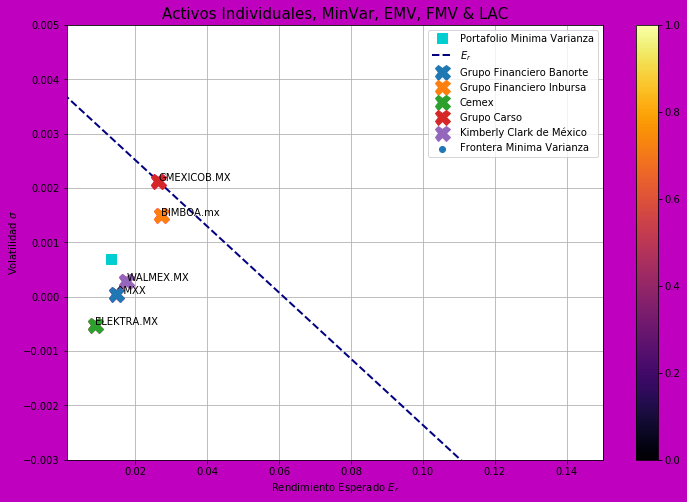

In [95]:
sp = Monthly.loc['Monthly Volatility'].values
Er = Monthly.loc['Monthly Mean'].values

x = sp
y = Er

plt.figure(figsize=(12,8),facecolor='m')
plt.title('Activos Individuales, MinVar, EMV, FMV & LAC',size = 15)
plt.scatter(frontera['$\sigma$'],frontera['$E_r$'],c=frontera['Sharpe'],cmap='inferno',label='Frontera Minima Varianza')
plt.plot(s_minvar,Er_minvar,'s',label='Portafolio Minima Varianza',ms=10,color='darkturquoise')
plt.plot(x,y,'X', color = 'deeppink',ms=15)
plt.plot(LAC['$\sigma$'],LAC['$E_r$'],'--',lw=2,color='navy')
plt.xlabel('Rendimiento Esperado $E_r$')
plt.ylabel('Volatilidad $\sigma$')

plt.plot(Monthly.loc['Monthly Volatility']['^MXX'],Monthly.loc['Monthly Mean']['^MXX'],'X',ms=15,label='Grupo Financiero Banorte')
plt.plot(Monthly.loc['Monthly Volatility']['BIMBOA.mx'],Monthly.loc['Monthly Mean']['BIMBOA.mx'],'X',ms=15,label='Grupo Financiero Inbursa')
plt.plot(Monthly.loc['Monthly Volatility']['ELEKTRA.MX'],Monthly.loc['Monthly Mean']['ELEKTRA.MX'],'X',ms=15,label='Cemex')
plt.plot(Monthly.loc['Monthly Volatility']['GMEXICOB.MX'],Monthly.loc['Monthly Mean']['GMEXICOB.MX'],'X',ms=15,label='Grupo Carso')
plt.plot(Monthly.loc['Monthly Volatility']['WALMEX.MX'],Monthly.loc['Monthly Mean']['WALMEX.MX'],'X',ms=15,label='Kimberly Clark de México')

plt.text(x[0],y[0],Monthly.columns[0])
plt.text(x[1],y[1],Monthly.columns[1])
plt.text(x[2],y[2],Monthly.columns[2])
plt.text(x[3],y[3],Monthly.columns[3])
plt.text(x[4],y[4],Monthly.columns[4])

plt.legend(loc='best',prop={'size': 10})
plt.xlim([0.001,0.15])
plt.ylim([-0.003,0.005])
plt.colorbar()
plt.grid()
plt.show()

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>